##Importing the Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Import and overview

In [6]:
# Loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

In [7]:
# Viewing the first 5 rows
insurance_dataset.head()

,insuree_id,age,sex,bmi,children,smoker,region,charges
0,CA2567,19,female,27.900,0,yes,southwest,16884.92400
1,CA4167,18,male,33.770,1,no,southeast,1725.55230
2,CA4159,28,male,33.000,3,no,southeast,4449.46200
3,CA6073,33,male,22.705,0,no,northwest,21984.47061
4,CA6601,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# Checking the number of rows and columns
insurance_dataset.shape

(1338, 8)

In [9]:
insurance_dataset.sample(5)

,insuree_id,age,sex,bmi,children,smoker,region,charges
205,CA6178,28,female,28.880,1,no,northeast,4337.73520
702,CA8831,53,male,41.470,0,no,southeast,9504.31030
312,CA5996,43,male,35.970,3,yes,southeast,42124.51530
1306,CA4257,29,female,21.850,0,yes,northeast,16115.30450
1229,CA6107,58,male,30.305,0,no,northeast,11938.25595


In [10]:
# Basic info about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   insuree_id  1338 non-null   object 
 1   age         1338 non-null   int64  
 2   sex         1338 non-null   object 
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   smoker      1338 non-null   object 
 6   region      1338 non-null   object 
 7   charges     1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


Categorical Features:
- Sex
- Smoker
- Region
- insuree_id

In [11]:
# Checking for missing values
insurance_dataset.isnull().sum()

insuree_id    0
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
dtype: int64

In [12]:
# Checking for duplicates
insurance_dataset.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

In [13]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

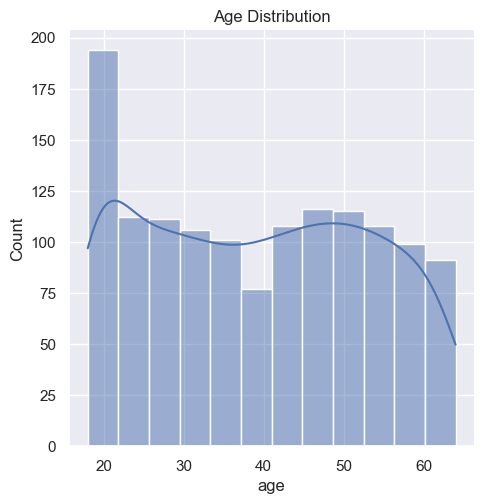

In [14]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(data=insurance_dataset, x="age", kde=True)
plt.title('Age Distribution')
plt.show()

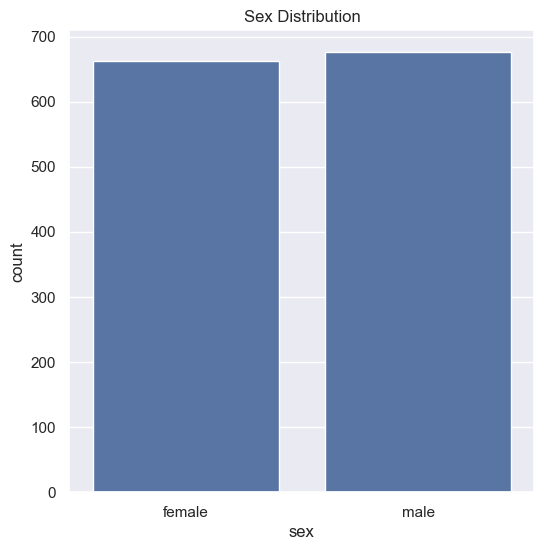

In [15]:
# Genderwise distribution
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [16]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

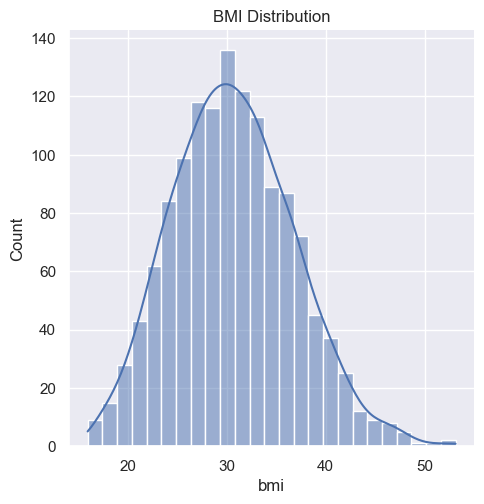

In [42]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.displot(data=insurance_dataset, x="bmi", kde=True)
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

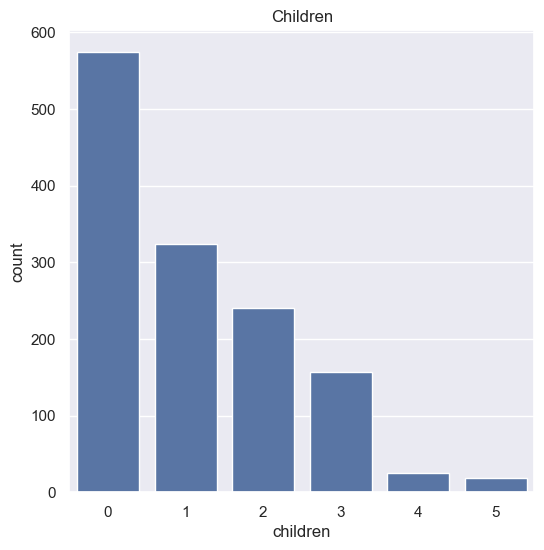

In [18]:
# No.of children
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [19]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

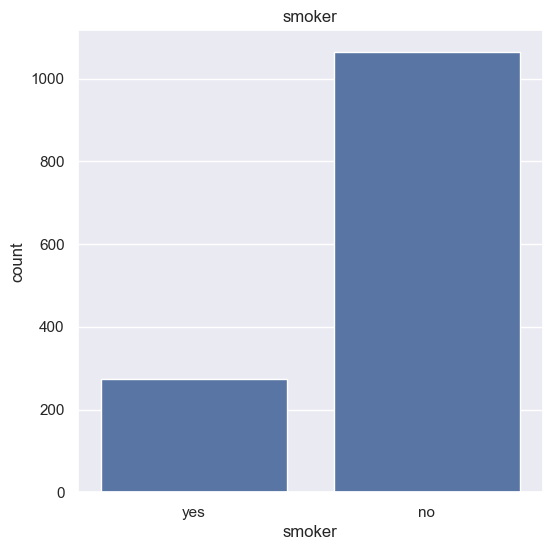

In [20]:
# No. of smokers
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [21]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

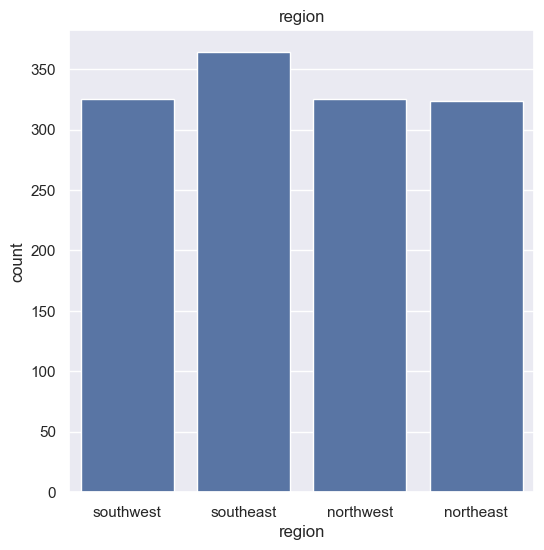

In [22]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [23]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

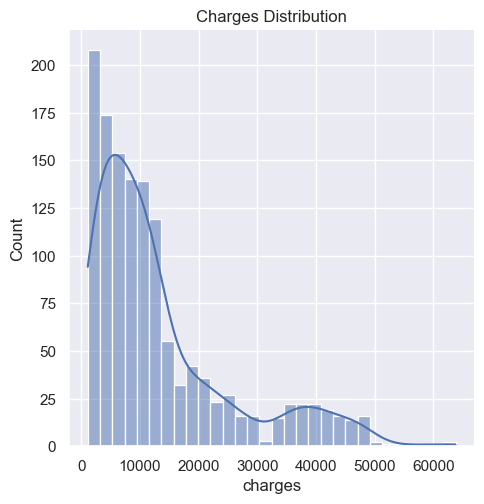

In [24]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(data=insurance_dataset, x="charges", kde=True)
plt.title('Charges Distribution')
plt.show()

In [25]:
pd.pivot_table(insurance_dataset, values='insuree_id', columns='smoker', index='sex',aggfunc='count')

smoker,no,yes
sex,,
female,547,115
male,517,159


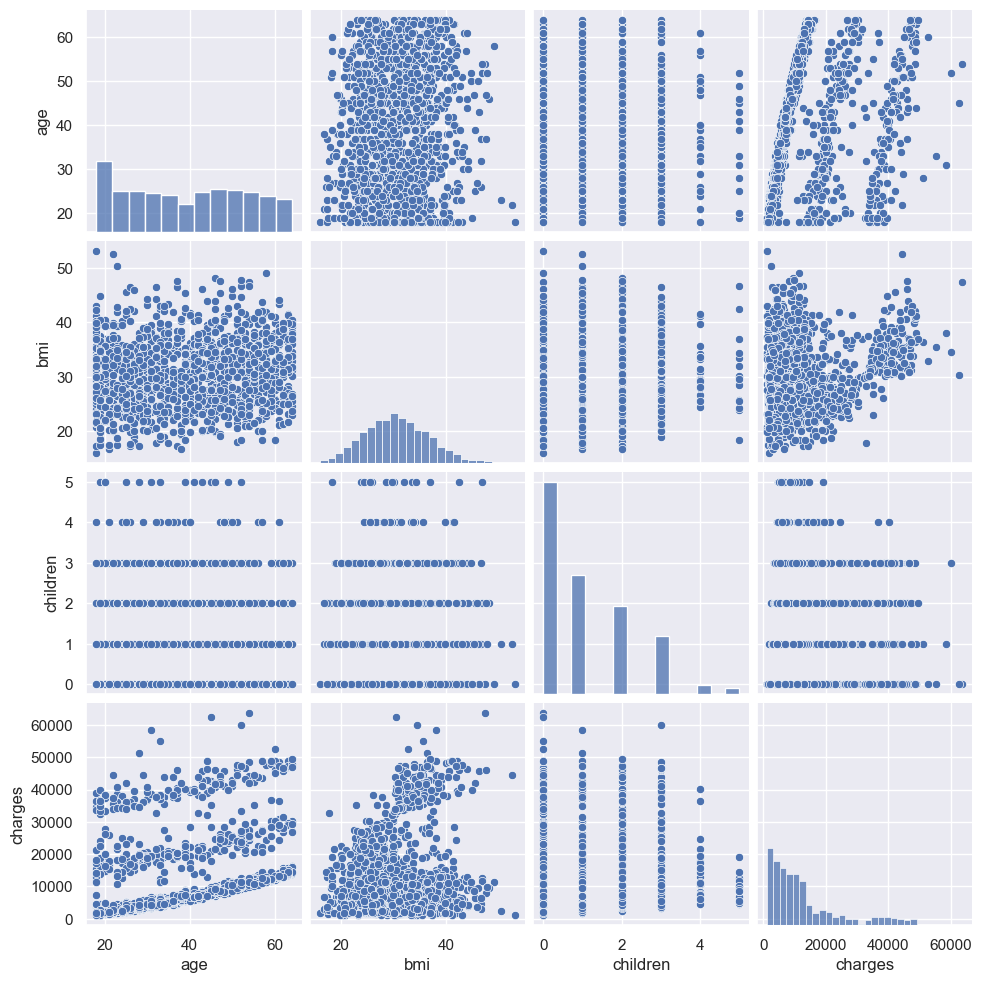

In [26]:
sns.pairplot(insurance_dataset)

## Data Pre-Processing

###Encoding the categorical features

In [27]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

/var/folders/18/_v666spd2wg7jqmdhvcmwq940000gn/T/ipykernel_5051/2871422651.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
/var/folders/18/_v666spd2wg7jqmdhvcmwq940000gn/T/ipykernel_5051/2871422651.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
/var/folders/18/_v666spd2wg7jqmdhvcmwq940000gn/T/ipykernel_5051/2871422651.py:8: FutureWarning: Downcasting behavior in `replace` is deprecate

### Deleting irrelevant columns

In [28]:
insurance_dataset=insurance_dataset.drop(columns='insuree_id',axis=1)

### Splitting the Features and Target

In [29]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [30]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [31]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### Splitting the data into Training data & Testing Data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Model Training

### Linear Regression

In [34]:
# loading the Linear Regression model
regressor = LinearRegression()

In [35]:
regressor.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [36]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [37]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [38]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [39]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


## Building a Predictive System

In [40]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is $', prediction[0])

[3760.0805765]
The insurance cost is $ 3760.080576496047


/Users/unvii/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
